# import

In [4]:
%matplotlib notebook
from qutip import *
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as scio
import random

# Bloch_current

## def

In [9]:
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [18]:
###哈密顿量，N比特个数，J为相互作用，U为非谐量，fre为频率，F为能级截断个数，取2为二能级截断
def Ham (N,J,U,fre,F):
    adag_s = [0]*N
    a_s = [0]*N
    n_s = [0]*N
    temp = [0]*N
    for i in range(N):
        temp[i] = identity (F)
    for i in range(N):
        temp [i] = create(F)
        adag_s [i] = tensor (temp)
        temp [i] = destroy(F)
        a_s [i] = tensor (temp)
        temp [i] = num(F)
        n_s [i] = tensor (temp)
        temp [i] = identity (F)
    H = 0
    for i in range (0,N-1):
        H = H + J[i]*(adag_s[i]*a_s[i+1] + a_s[i]*adag_s[i+1])

    for i in range (N):
        H = H + fre[i]*n_s[i]

    for i in range (N):
        H = H + U[i]*(n_s[i]*n_s[i]-n_s[i])

    return H


####初态的制备
def inista (N):
    v1 = Qobj([[0],[1]])  ###1态
    v0 = Qobj([[1],[0]])  ###0态
    temp = [0]*int(N)
    for i in range(0,N):
        temp[i] = v0
    temp[0] = v1          ###激发第一个比特

##    temp[N-2] = Qobj([[1],[1]])/1.414
##    temp[N-1] = Qobj([[1],[-1]])/1.414
    ini = tensor(temp)
    return ini

####第n个比特的激发态密度矩阵
def den (N,n):
    temp = [0]*N
    for k in range(N):
        temp[k] = identity (2)

    temp [n] = num(2)
    den = tensor (temp)

    return den

####第n个比特的X矩阵
def Mx (N,n):
    temp = [0]*N
    for k in range(N):
        temp[k] = identity (2)

    temp [n] = sigmax()
    den = tensor (temp)

    return den

####第n个比特的Y矩阵
def My (N,n):
    temp = [0]*N
    for k in range(N):
        temp[k] = identity (2)

    temp [n] = sigmay()
    den = tensor (temp)

    return den

def Them (N,J,fre1,fre2,F,n):
    adag_s = [0]*N
    a_s = [0]*N
    n_s = [0]*N
    temp = [0]*N
    for i in range(N):
        temp[i] = identity (F)

    for i in range(N):
        temp [i] = create(F)
        adag_s [i] = tensor (temp)
        temp [i] = destroy(F)
        a_s [i] = tensor (temp)
        temp [i] = num(F)
        n_s [i] = tensor (temp)
        temp [i] = identity (F)

    Hd = J*(adag_s[n]*a_s[n+1] + a_s[n]*adag_s[n+1])
    Hd = Hd + fre1*(2*n_s[n]-1)+fre2*(2*n_s[n+1]-1)
    return Hd

####耗散
def dec(N,t1):
    temp = [0]*N
    nosiy = 0
    for k in range(N):
        temp[k] = identity (2)
    for n in range(N):
        temp [n] = sigmam()
        a = tensor (temp)
        temp [n] = identity(2)
        nosiy = nosiy+np.sqrt(t1)*a

    return nosiy


## caculate

### para

In [54]:
N = 10
D = 100
times = 2*3.1416*np.linspace(0.0, 0.3, 301)
J0 =np.array([14.26, 14.17, 14.65, 14.6,14.26, 14.17, 14.65, 14.6, 14.26])
U = np.array([-242, -196, -239, -196, -242]*2)
vec = inista(N)

dw_dist = np.zeros(shape=(10,301))
for i in range(0,D):
    fre = 14*(np.random.rand(10)-0.5)
#    fre = np.array([10,20,30,40,50])
  # print(fre)
    Delta = np.array(fre[1:10]-fre[0:9])
    J = J0*J0/np.sqrt(J0*J0+Delta*Delta)
    H = Ham(N,J,U,fre,2)
    dy_ = mesolve(H,vec,times,[],[den(N,0),den(N,1),den(N,2),den(N,3),den(N,4),den(N,5),den(N,6),den(N,7),den(N,8),den(N,9)])
    dw_dist = dw_dist+np.array(dy_.expect)
dw_dist = dw_dist/D


<IPython.core.display.Javascript object>


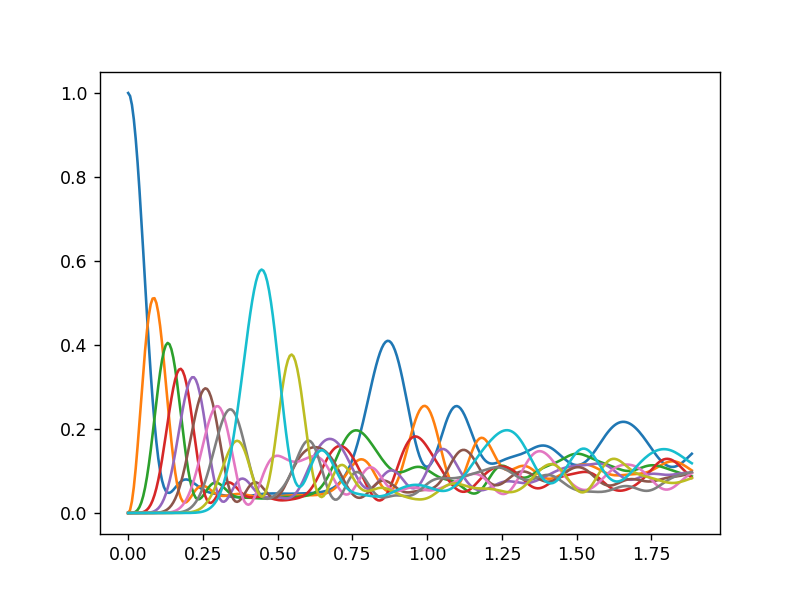

0.3432983498793129


In [56]:
plt.figure() 

plt.plot(dy_.times,dw_dist[0,:] )
plt.plot(dy_.times,dw_dist[1,:] )
plt.plot(dy_.times,dw_dist[2,:] )
plt.plot(dy_.times,dw_dist[3,:] )
plt.plot(dy_.times,dw_dist[4,:] )
plt.plot(dy_.times,dw_dist[5,:] )
plt.plot(dy_.times,dw_dist[6,:] )
plt.plot(dy_.times,dw_dist[7,:] )
plt.plot(dy_.times,dw_dist[8,:] )
plt.plot(dy_.times,dw_dist[9,:] )

print(np.max(dw_dist[3,:]))
# print(dw_dist[4,:])
plt.show()

In [63]:
N = 10
D = 100
times = 2*3.1416*np.linspace(0.0, 0.3, 301)
# J0 =np.array([14.26, 14.17, 14.65, 14.6])
J0 =np.array([14.26, 14.17, 14.65, 14.6,14.26, 14.17, 14.65, 14.6,14.26])
U = np.array([-242, -196, -239, -196, -242]*2)
vec = inista(N)

dw_dist = np.zeros(shape=(10,201))

fre = np.arange(-20,21,4)
# fre = np.array([0,0,0,0,0]*2)
print(fre)
##Delta = np.array(fre[1:5]-fre[0:4])
#J = J0*J0/np.sqrt(J0*J0+Delta*Delta)
H = Ham(N,J0,U,fre,2)
# dy = mesolve(H,vec,times,[],[den(N,0),den(N,1),den(N,2),den(N,3)])
dy = mesolve(H,vec,times,[],[Mx(N,0)*My(N,1)-My(N,0)*Mx(N,1),Mx(N,1)*My(N,2)-My(N,1)*Mx(N,2),
                              Mx(N,2)*My(N,3)-My(N,2)*Mx(N,3),Mx(N,3)*My(N,4)-My(N,3)*Mx(N,4),
                            Mx(N,4)*My(N,5)-My(N,4)*Mx(N,5),Mx(N,5)*My(N,6)-My(N,5)*Mx(N,6),
                            Mx(N,6)*My(N,7)-My(N,6)*Mx(N,7),Mx(N,7)*My(N,8)-My(N,7)*Mx(N,8),
                            Mx(N,8)*My(N,9)-My(N,8)*Mx(N,9)])
#dy_ = mesolve(H,vec,times,[],[Them(N,J[0],fre[0],fre[1],2,0),Them(N,J[1],fre[1],fre[2],2,1),Them(N,J[2],fre[2],fre[3],2,2),Them(N,J[3],fre[3],fre[4],2,3)])
#dy_ = mesolve(H,vec,times,[],[Them(N,J0[0],0,0,2,0),Them(N,J0[1],0,0,2,1),Them(N,J0[2],0,0,2,2),Them(N,J0[3],0,0,2,3),den(N,0),den(N,1),den(N,2),den(N,3),den(N,4)])
# dw_dist = dw_dist+np.array(dy_.expect)


dataFile = 'D:/Yan/caculate/Edge_lin_E_10_spincurr.mat'
scio.savemat(dataFile,{'dy':dy.expect})


[-20 -16 -12  -8  -4   0   4   8  12  16  20]


<IPython.core.display.Javascript object>


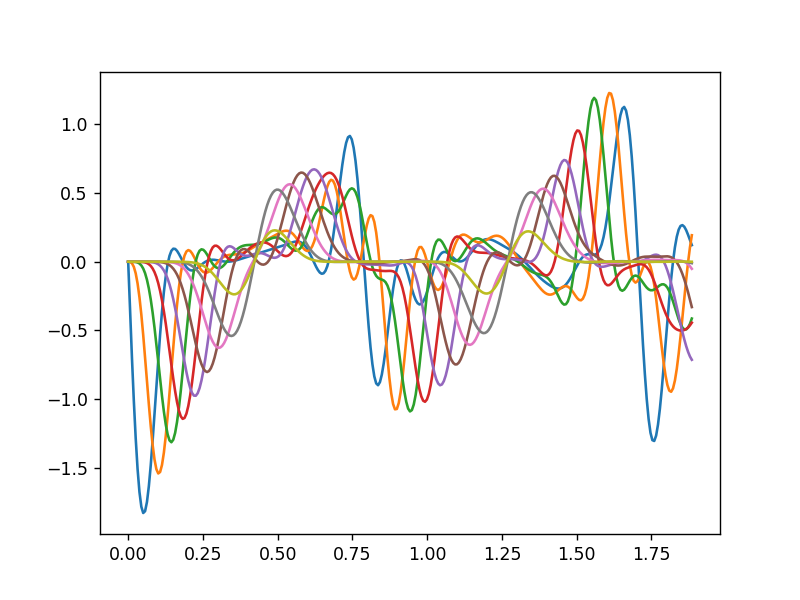

In [64]:
plt.figure() 
plt.plot(dy.times,dy.expect[0],'-' )
plt.plot(dy.times,dy.expect[1] ,'-')
plt.plot(dy.times,dy.expect[2] ,'-')
plt.plot(dy.times,dy.expect[3] ,'-')
plt.plot(dy.times,dy.expect[4],'-' )
plt.plot(dy.times,dy.expect[5] ,'-')
plt.plot(dy.times,dy.expect[6] ,'-')
plt.plot(dy.times,dy.expect[7] ,'-')
plt.plot(dy.times,dy.expect[8] ,'-')
# plt.plot(dy.times,dy.expect[9] ,'-')

# print(np.max(dw_dist[3,:]))
#print(dw_dist[4,:])
plt.show()